# ATSC 500 Assignment I (Reynolds averaging)

In [1]:
import numpy as np
import netCDF4 as nc
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline

In [2]:
filename = glob('_data/ATSC-500/case_60_10.nc')[0]

In [3]:
nc_obj = nc.Dataset(filename)
# Get vertical coord
z = nc_obj.variables['z'][...]
time = nc_obj.variables['time'][...]
# Get group names
nc_gps = list(nc_obj.groups.keys())
# The key and dim of vars are the same in all the gps
shape_grid = nc_obj[nc_gps[0]].variables['TABS'].shape
# Add the number of gps into the shape
shape_all = (len(nc_gps),) + shape_grid
W = np.zeros(shape_all)*np.nan
TABS = np.zeros(shape_all)*np.nan
# loop over all the groups
for i in range(len(nc_gps)):
    W[i, ...] = nc_obj[nc_gps[i]].variables['W'][...]
    TABS[i, ...] = nc_obj[nc_gps[i]].variables['TABS'][...]
# ...
nc_obj.close()

Calculating $\left\langle w'\theta ' \right\rangle$ at index location $\left(20, 20\right)$ and the last time record for all vertical levels:

$$
\left\langle w'\theta ' \right\rangle = \left(w - \overline w\right)\cdot\left(\theta - \overline\theta\right)
$$

Where the overline is Reynolds averaging on time.

In [4]:
W_ave = np.mean(W[:, :, :, 19, 19], 1)
TABS_ave = np.mean(TABS[:, :, :, 19, 19], 1)
H_flux = (W[:, -1, :, 19, 19] - W_ave)*(TABS[:, -1, :, 19, 19] - TABS_ave)

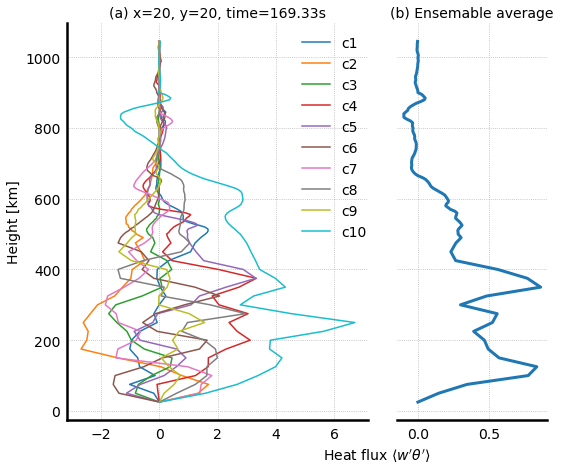

In [5]:
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0]); ax2 = fig.add_subplot(gs[1])
AX = [ax1, ax2]
for ax in AX:
    ax.grid(linestyle=':')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    [j.set_linewidth(2.5) for j in ax.spines.values()]
    ax.tick_params(axis="both", which="both", bottom="off", top="off", \
           labelbottom="on", left="off", right="off", labelleft="on")
ax2.spines["left"].set_visible(False)
ax2.tick_params(labelleft="off")
for i, gp in enumerate(nc_gps):
    ax1.plot(H_flux[i, :], z, label=gp)
ax2.plot(np.mean(H_flux, 0), z, lw=3)
LG = ax1.legend(bbox_to_anchor=(1.035, 1), prop={'size':14}); LG.draw_frame(False)

ax1.text(0.85, -0.1, r"Heat flux $\left\langle w'\theta ' \right\rangle$", transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel(r"Height [km]", fontsize=14)
ax1.set_title(r"(a) x=20, y=20, time={:.2f}s".format(time[-1]), fontsize=14);
ax2.set_title("(b) Ensemable average", fontsize=14);
plt.tight_layout()